### Goal
To backdoor into the raw data Chris Martz used to build his Hurricane Frequency chart.

ie, using only the picture of his stacked bar chart, assign data to the stack pieces.

NB: there are multiple region pieces per year, unexpectedly

### Reverse engineering Chris' source data
It was quite the manual process but only took about an hour.

I just looked at a zoomed image of his bar chart and extracted the data with the aid of a quick paper ruler I made (length of 5 with marks at 2 and 3 for ease of identification).

In [1]:
import polars as pl
import helper

In [2]:
# Making the csv header row
s = 'region,' 
for y in range(1980, 2024):
    s += str(y) + ','
print(s)

region,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,


In [3]:
df = (
    pl.read_csv('data/reverse-engineered.csv')
    .group_by('region').sum()
)

In [4]:
from enum import IntEnum, auto

class Region(IntEnum):
    NORTHWEST_PACIFIC = auto()
    NORTHEAST_PACIFIC = auto()
    NORTH_ATLANTIC = auto()
    SOUTH_INDIAN = auto()
    SOUTH_PACIFIC = auto()
    NORTH_INDIAN = auto()

# Define regions with their properties
region_properties = {
    Region.NORTHWEST_PACIFIC: {'label': 'Northwest Pacific', 'color': '#15027d'},
    Region.NORTHEAST_PACIFIC: {'label': 'Northeast Pacific', 'color': '#4677a3'},
    Region.NORTH_ATLANTIC: {'label': 'North Atlantic', 'color': '#34aa9f'},
    Region.SOUTH_INDIAN: {'label': 'South Indian', 'color': '#54dacb'},
    Region.SOUTH_PACIFIC: {'label': 'South Pacific', 'color': '#648412'},
    Region.NORTH_INDIAN: {'label': 'North Indian', 'color': '#cc9c09'},
}

# Functions to access properties:
def get_label(region):
    return region_properties[region]['label']

def get_color(region):
    return region_properties[region]['color']

# Sorting the regions by their enum values (which are auto-incrementing integers)
region_sort_order = sorted(Region)
region_labels = {region.name.lower().replace('_', ''): get_label(region) for region in region_sort_order}
region_colors = {region.name.lower().replace('_', ''): get_color(region) for region in region_sort_order}

# Example usage
print(region_labels)  # Will print the dictionary of regions to labels
print(region_colors)  # Will print the dictionary of regions to colors

{'northwestpacific': 'Northwest Pacific', 'northeastpacific': 'Northeast Pacific', 'northatlantic': 'North Atlantic', 'southindian': 'South Indian', 'southpacific': 'South Pacific', 'northindian': 'North Indian'}
{'northwestpacific': '#15027d', 'northeastpacific': '#4677a3', 'northatlantic': '#34aa9f', 'southindian': '#54dacb', 'southpacific': '#648412', 'northindian': '#cc9c09'}


In [5]:
df

region,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""northeastpacific""",3,1,5,8,7,8,3,4,3,4,6,5,10,9,5,3,2,7,6,2,2,2,6,0,3,2,6,1,2,5,2,6,5,1,9,11,6,4,10,4,3,2,4,8
"""northwestpacific""",9,6,12,6,9,6,8,12,7,9,8,11,11,9,12,7,10,12,5,4,7,12,11,11,14,10,10,9,8,7,4,7,10,11,7,16,11,5,9,11,7,5,5,8
"""northindian""",0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,1,1,3,3,0,1,0,0,0,0,1,2,1,0,2,0,0,1,2,2,0,1,2,5,2,1,0,3
"""southpacific""",1,0,0,5,1,5,0,1,2,4,1,1,4,5,4,1,1,3,1,1,1,1,1,6,2,5,2,1,3,1,4,3,1,3,2,4,2,2,3,2,1,2,0,2
"""northatlantic""",2,3,1,1,1,3,0,1,3,2,1,2,1,1,0,5,6,1,3,5,3,4,2,3,6,7,2,2,5,2,5,4,2,0,2,2,4,6,2,3,6,4,2,3
"""southindian""",5,5,1,0,2,0,5,0,1,2,2,1,2,0,2,5,5,1,1,3,6,2,6,0,4,0,2,5,1,3,2,0,1,2,3,2,1,1,2,5,2,1,5,3


In [6]:
df

region,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""northeastpacific""",3,1,5,8,7,8,3,4,3,4,6,5,10,9,5,3,2,7,6,2,2,2,6,0,3,2,6,1,2,5,2,6,5,1,9,11,6,4,10,4,3,2,4,8
"""northwestpacific""",9,6,12,6,9,6,8,12,7,9,8,11,11,9,12,7,10,12,5,4,7,12,11,11,14,10,10,9,8,7,4,7,10,11,7,16,11,5,9,11,7,5,5,8
"""northindian""",0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,1,1,3,3,0,1,0,0,0,0,1,2,1,0,2,0,0,1,2,2,0,1,2,5,2,1,0,3
"""southpacific""",1,0,0,5,1,5,0,1,2,4,1,1,4,5,4,1,1,3,1,1,1,1,1,6,2,5,2,1,3,1,4,3,1,3,2,4,2,2,3,2,1,2,0,2
"""northatlantic""",2,3,1,1,1,3,0,1,3,2,1,2,1,1,0,5,6,1,3,5,3,4,2,3,6,7,2,2,5,2,5,4,2,0,2,2,4,6,2,3,6,4,2,3
"""southindian""",5,5,1,0,2,0,5,0,1,2,2,1,2,0,2,5,5,1,1,3,6,2,6,0,4,0,2,5,1,3,2,0,1,2,3,2,1,1,2,5,2,1,5,3


In [7]:
list(df.columns[1:])

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

northwestpacific [9, 6, 12, 6, 9, 6, 8, 12, 7, 9, 8, 11, 11, 9, 12, 7, 10, 12, 5, 4, 7, 12, 11, 11, 14, 10, 10, 9, 8, 7, 4, 7, 10, 11, 7, 16, 11, 5, 9, 11, 7, 5, 5, 8]
northeastpacific [3, 1, 5, 8, 7, 8, 3, 4, 3, 4, 6, 5, 10, 9, 5, 3, 2, 7, 6, 2, 2, 2, 6, 0, 3, 2, 6, 1, 2, 5, 2, 6, 5, 1, 9, 11, 6, 4, 10, 4, 3, 2, 4, 8]
northatlantic [2, 3, 1, 1, 1, 3, 0, 1, 3, 2, 1, 2, 1, 1, 0, 5, 6, 1, 3, 5, 3, 4, 2, 3, 6, 7, 2, 2, 5, 2, 5, 4, 2, 0, 2, 2, 4, 6, 2, 3, 6, 4, 2, 3]
southindian [5, 5, 1, 0, 2, 0, 5, 0, 1, 2, 2, 1, 2, 0, 2, 5, 5, 1, 1, 3, 6, 2, 6, 0, 4, 0, 2, 5, 1, 3, 2, 0, 1, 2, 3, 2, 1, 1, 2, 5, 2, 1, 5, 3]
southpacific [1, 0, 0, 5, 1, 5, 0, 1, 2, 4, 1, 1, 4, 5, 4, 1, 1, 3, 1, 1, 1, 1, 1, 6, 2, 5, 2, 1, 3, 1, 4, 3, 1, 3, 2, 4, 2, 2, 3, 2, 1, 2, 0, 2]
northindian [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 3, 3, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 5, 2, 1, 0, 3]


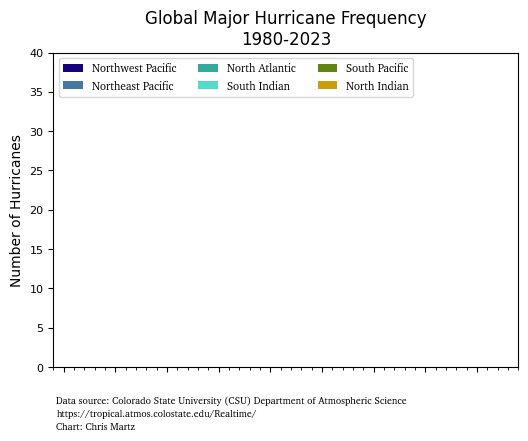

27

In [8]:
helper.make_chart(df)